In [1]:
import pyupbit
import pandas as pd
from dotenv import load_dotenv
import os
from datetime import datetime, timedelta
import datetime as dt
import time

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

In [4]:
load_dotenv()

access_key = os.environ['access_key']
secret_key = os.environ['secret_key']

# ÏóÖÎπÑÌä∏ Í∞ùÏ≤¥ ÏÉùÏÑ±
upbit = pyupbit.Upbit(access_key, secret_key)


In [5]:
# Î≥¥Ïú† ÏûîÏï° ÌôïÏù∏
balances = upbit.get_balances(contain_req=True)
print("Î≥¥Ïú† ÏûêÏÇ∞ Î™©Î°ù:")
print(balances)

# ÎπÑÌä∏ÏΩîÏù∏ ÌòÑÏû¨ Í∞ÄÍ≤© Ï°∞Ìöå
price = pyupbit.get_current_price("KRW-BTC")
print(f"ÌòÑÏû¨ ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤©: {price}Ïõê")


Î≥¥Ïú† ÏûêÏÇ∞ Î™©Î°ù:
([], {'group': 'default', 'min': 1800, 'sec': 29})
ÌòÑÏû¨ ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤©: 161202000.0Ïõê


In [32]:
t = pd.to_datetime(datetime.now()) - timedelta(minutes=10)

t = "2017-09-25 12:05:00"
t = "2025-08-18 00:00:00"
t = pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S') - timedelta(hours=9)
t = t.strftime('%Y-%m-%d %H:%M:00')

df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="minute1", count=5, to=t)
print(df)

                            open         high          low        close  \
2025-08-17 23:55:00  163530000.0  163536000.0  163520000.0  163520000.0   
2025-08-17 23:56:00  163520000.0  163520000.0  163510000.0  163511000.0   
2025-08-17 23:57:00  163511000.0  163511000.0  163504000.0  163505000.0   
2025-08-17 23:58:00  163505000.0  163505000.0  163500000.0  163501000.0   
2025-08-17 23:59:00  163501000.0  163525000.0  163500000.0  163505000.0   

                       volume         value  
2025-08-17 23:55:00  0.371821  6.080245e+07  
2025-08-17 23:56:00  0.340388  5.565761e+07  
2025-08-17 23:57:00  0.255730  4.181414e+07  
2025-08-17 23:58:00  1.110321  1.815386e+08  
2025-08-17 23:59:00  0.585600  9.575024e+07  


In [ ]:
import pyupbit
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm  # tqdm ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.

print("Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")

now = pd.to_datetime("2025-08-18 00:00:00", format='%Y-%m-%d %H:%M:%S')
# now = pd.to_datetime("2017-09-25 12:10:00", format='%Y-%m-%d %H:%M:%S')
coin = "KRW-BTC" # KRW-BTC, KRW-ETH, KRW-XRP

# --- ÏÑ§Ï†ï ---
# days_to_collect = 1825
# target_date = now - timedelta(days=days_to_collect)
target_date = pd.to_datetime("2017-09-25 00:00:00", format='%Y-%m-%d %H:%M:%S')
days_to_collect = (now - target_date).days
count_per_request = 200

# --- Ï§ëÍ∞Ñ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï ---
save_interval = 100  # 100Î≤àÏùò ÏöîÏ≤≠ÎßàÎã§ Ï§ëÍ∞Ñ Ï†ÄÏû•
loop_count = 0
output_dir = "./data/"
output_filepath = f"{output_dir}{coin[-3:]}_data_all.csv"

# --- tqdmÏùÑ ÏúÑÌïú Ï†ÑÏ≤¥ ÏßÑÌñâÎüâ Í≥ÑÏÇ∞ ---
# 30ÏùºÏùÄ Ï¥ù Î™á Î∂ÑÏù∏ÏßÄ Í≥ÑÏÇ∞Ìï©ÎãàÎã§. (1Î∂ÑÎ¥â Í∏∞Ï§Ä)
total_minutes = days_to_collect * 24 * 60

# --- Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ---
all_df = pd.DataFrame()
to_time = now

# tqdmÏùÑ with Î¨∏Í≥º Ìï®Íªò ÏÇ¨Ïö©ÌïòÏó¨ Î£®ÌîÑÍ∞Ä ÎÅùÎÇòÎ©¥ ÏûêÎèôÏúºÎ°ú Ï†ïÎ¶¨ÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
with tqdm(total=total_minutes, desc="1Î∂ÑÎ¥â Îç∞Ïù¥ÌÑ∞ ÏàòÏßë") as pbar:
    while True:
        try:
            df = pyupbit.get_ohlcv(ticker=coin, interval="minute1", count=count_per_request, to=(to_time - timedelta(hours=9)).strftime('%Y-%m-%d %H:%M:00'))

            if df is None or df.empty:
                print("\nÎçî Ïù¥ÏÉÅ Í∞ÄÏ†∏Ïò¨ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÍ±∞ÎÇò API ÏùëÎãµÏù¥ ÏóÜÏäµÎãàÎã§.")
                break

            all_df = pd.concat([df, all_df])
            loop_count += 1
            
            pbar.update(len(df))
            oldest_time_in_df = df.index[0]
            pbar.set_description(f"ÏàòÏßë ÏãúÏ†ê: {oldest_time_in_df.strftime('%Y-%m-%d %H:%M')}")

            # --- Ï§ëÍ∞Ñ Ï†ÄÏû• Î°úÏßÅ ---
            if loop_count % save_interval == 0:
                # Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ Î∞è Ï†ïÎ†¨ ÌõÑ Ï†ÄÏû•
                temp_df = all_df.drop_duplicates().sort_index()
                print(f"\n[{loop_count}Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... ({output_filepath})")
                temp_df.to_csv(output_filepath, encoding='utf-8-sig')
                print(f"Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ {len(temp_df)}Í∞ú")

            if oldest_time_in_df <= target_date:
                print(f"\nÎ™©Ìëú ÎÇ†Ïßú({target_date.strftime('%Y-%m-%d')}) Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞Ïóê ÎèÑÎã¨ÌïòÏó¨ ÏàòÏßëÏùÑ ÏôÑÎ£åÌï©ÎãàÎã§.")
                break
                
            to_time = oldest_time_in_df
            time.sleep(0.1)
        
        except Exception as e:
            print(f"\nÏò§Î•ò Î∞úÏÉù: {e}. 5Ï¥à ÌõÑ Ïû¨ÏãúÎèÑÌï©ÎãàÎã§.")
            time.sleep(5)


# --- Îç∞Ïù¥ÌÑ∞ ÌõÑÏ≤òÎ¶¨ Î∞è ÏµúÏ¢Ö Ï†ÄÏû• ---
print("\n--- ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ Î∞è Ï†ÄÏû• ---")
if not all_df.empty:
    final_df = all_df.drop_duplicates().sort_index()
    # ÏàòÏßë Î£®ÌîÑÏóêÏÑú target_date Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞ÍπåÏßÄ Ìè¨Ìï®ÎêòÏóàÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú ÌïÑÌÑ∞ÎßÅ
    final_df = final_df[final_df.index >= target_date]
    final_df.to_csv(output_filepath, encoding='utf-8-sig')
else:
    final_df = all_df

print("\n--- ÏµúÏ¢Ö ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ ---")
if not final_df.empty:
    print(f"ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(final_df)}Í∞ú")
    print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {final_df.index[0]} ~ {final_df.index[-1]}")
    print("\nÍ∞ÄÏû• Ïò§ÎûòÎêú Îç∞Ïù¥ÌÑ∞:")
    print(final_df.head(1))
    print("\nÍ∞ÄÏû• ÏµúÏã† Îç∞Ïù¥ÌÑ∞:")
    print(final_df.tail(1))
else:
    print("ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

print(f"\nÎ™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú '{output_filepath}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


ÏàòÏßë ÏãúÏ†ê: 2018-01-17 17:50:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3960000/4152960 [1:54:21<02:57, 1085.96it/s]


[19800Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2018-01-17 17:50:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3960000/4152960 [1:54:33<02:57, 1085.96it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 3959607Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2018-01-03 19:57:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3980000/4152960 [1:55:11<02:45, 1047.27it/s]


[19900Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2018-01-03 19:57:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3980000/4152960 [1:55:23<02:45, 1047.27it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 3979607Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-12-20 19:29:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 4000000/4152960 [1:55:59<02:27, 1038.94it/s]


[20000Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2017-12-20 19:29:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 4000000/4152960 [1:56:13<02:27, 1038.94it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 3999607Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-12-06 15:55:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 4020000/4152960 [1:56:48<02:09, 1024.41it/s]


[20100Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2017-12-06 15:55:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 4020000/4152960 [1:57:03<02:09, 1024.41it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 4019607Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-11-22 17:34:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 4040000/4152960 [1:57:38<01:50, 1026.50it/s]


[20200Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2017-11-22 17:34:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 4040000/4152960 [1:57:53<01:50, 1026.50it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 4039607Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-11-08 18:34:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 4060000/4152960 [1:58:28<01:32, 1002.15it/s]


[20300Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2017-11-08 18:34:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 4060000/4152960 [1:58:44<01:32, 1002.15it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 4059607Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-10-24 17:14:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 4080000/4152960 [1:59:18<01:11, 1015.83it/s]


[20400Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2017-10-24 17:14:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 4080000/4152960 [1:59:34<01:11, 1015.83it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 4079399Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-10-04 04:49:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 4100000/4152960 [2:00:08<00:53, 995.79it/s] 


[20500Î≤àÏß∏ ÏöîÏ≤≠] Ï§ëÍ∞Ñ Ï†ÄÏû• ÏßÑÌñâ... (./data/BTC_1min_data_all.csv)


ÏàòÏßë ÏãúÏ†ê: 2017-10-04 04:49:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 4100000/4152960 [2:00:24<00:53, 995.79it/s]

Ï†ÄÏû• ÏôÑÎ£å. ÌòÑÏû¨ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 4099356Í∞ú


ÏàòÏßë ÏãúÏ†ê: 2017-09-25 12:00:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 4111158/4152960 [2:00:49<01:13, 567.07it/s] 



Îçî Ïù¥ÏÉÅ Í∞ÄÏ†∏Ïò¨ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÍ±∞ÎÇò API ÏùëÎãµÏù¥ ÏóÜÏäµÎãàÎã§.

--- ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ Î∞è Ï†ÄÏû• ---

--- ÏµúÏ¢Ö ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ ---
ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 4110499Í∞ú
Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 2017-09-25 12:00:00 ~ 2025-08-17 23:59:00

Í∞ÄÏû• Ïò§ÎûòÎêú Îç∞Ïù¥ÌÑ∞:
                          open       high        low      close    volume  \
2017-09-25 12:00:00  4201000.0  4220000.0  4195000.0  4216000.0  3.811221   

                            value  
2017-09-25 12:00:00  1.603785e+07  

Í∞ÄÏû• ÏµúÏã† Îç∞Ïù¥ÌÑ∞:
                            open         high          low        close  \
2025-08-17 23:59:00  163501000.0  163525000.0  163500000.0  163505000.0   

                     volume         value  
2025-08-17 23:59:00  0.5856  9.575024e+07  

Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú './data/BTC_1min_data_all.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
import yfinance as yf
import pandas as pd

interval = "1h"

# S&P 500 Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (Ìã∞Ïª§: ^GSPC)
# period="730d": ÏµúÍ∑º 730ÏùºÍ∞ÑÏùò Îç∞Ïù¥ÌÑ∞
# interval="60m": 60Î∂Ñ(1ÏãúÍ∞Ñ) Î¥â Îã®ÏúÑ
sp500_data = yf.download(tickers="^GSPC", period="91d", interval=interval)

# ÎÇòÏä§Îã• Ï¢ÖÌï©ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (Ìã∞Ïª§: ^IXIC)
nasdaq_data = yf.download(tickers="^IXIC", period="91d", interval=interval)

# Í∏à ÏÑ†Î¨º
gold_data = yf.download(tickers="GC=F", period="100d", interval=interval)

# Îã¨Îü¨ Ïù∏Îç±Ïä§
dollar_data = yf.download(tickers="DX-Y.NYB", period="100d", interval=interval)


# Îã§Ïö¥Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞Î•º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
sp500_data.to_csv(f"sp500_{interval}_data.csv")
nasdaq_data.to_csv(f"nasdaq_{interval}_data.csv")
gold_data.to_csv(f"Gold_{interval}_data.csv")
dollar_data.to_csv(f"Dollar_{interval}_data.csv")

C:\Users\endermaru\AppData\Local\Temp\ipykernel_35804\3705927807.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data = yf.download(tickers="GC=F", period="100d", interval=interval)
[*********************100%***********************]  1 of 1 completed
C:\Users\endermaru\AppData\Local\Temp\ipykernel_35804\3705927807.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dollar_data = yf.download(tickers="DX-Y.NYB", period="100d", interval=interval)
[*********************100%***********************]  1 of 1 completed


# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### 1Î∂ÑÎ¥â

In [ ]:
start_date = '2025-05-12 00:00:00'
end_date = '2025-08-09 23:59:00'

# 1Î∂Ñ Îã®ÏúÑÏùò DatetimeIndexÎ•º ÏÉùÏÑ±ÌïòÍ≥†, 'Asia/Seoul' ÏãúÍ∞ÑÎåÄÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
date_range_index = pd.date_range(start=start_date, end=end_date, freq='min')

# ÏÉùÏÑ±Îêú Ïù∏Îç±Ïä§Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îπà DataFrameÏùÑ ÎßåÎì≠ÎãàÎã§.
df_coin = pd.DataFrame(index=date_range_index)
df_coin.head()

df_btc = pd.read_csv("./data/BTC_1min_data.csv", index_col=0, parse_dates=True)[['open','high','low','close','volume']]
df_btc.columns = 'btc_' + df_btc.columns

df_eth = pd.read_csv("./data/ETH_1min_data.csv", index_col=0, parse_dates=True)[['open','high','low','close','volume']]
df_eth.columns = 'eth_' + df_eth.columns

df_xrp = pd.read_csv("./data/XRP_1min_data.csv", index_col=0, parse_dates=True)[['open','high','low','close','volume']]
df_xrp.columns = 'xrp_' + df_xrp.columns

df_coin = pd.concat([df_coin, df_btc, df_eth, df_xrp], axis=1)

df_coin.index.name = 'Datetime'

# df = df[df.index >= pd.to_datetime("2025-05-13 00:00:00")]
df_coin.head()

btc_open     btc_high      btc_low    btc_close  \
Datetime                                                                  
2025-05-12 00:00:00  145676000.0  145677000.0  145626000.0  145677000.0   
2025-05-12 00:01:00  145677000.0  145700000.0  145623000.0  145623000.0   
2025-05-12 00:02:00  145625000.0  145700000.0  145620000.0  145623000.0   
2025-05-12 00:03:00  145695000.0  145700000.0  145624000.0  145693000.0   
2025-05-12 00:04:00  145693000.0  145755000.0  145693000.0  145755000.0   

                     btc_volume   eth_open   eth_high    eth_low  eth_close  \
Datetime                                                                      
2025-05-12 00:00:00    0.374630  3477000.0  3479000.0  3474000.0  3478000.0   
2025-05-12 00:01:00    0.188528  3478000.0  3482000.0  3478000.0  3478000.0   
2025-05-12 00:02:00    0.728360  3480000.0  3482000.0  3479000.0  3482000.0   
2025-05-12 00:03:00    0.281259  3480000.0  3485000.0  3479000.0  3485000.0   
2025-05-12 00:04:00    0.861492  3485000.0  3493000.0  3485000.0  3491000.0   

                     eth_volume  xrp_open  xrp_high  xrp_low  xrp_close  \
Datetime                                                                  
2025-05-12 00:00:00    6.891271    3302.0    3302.0   3299.0     3301.0   
2025-05-12 00:01:00    9.746652    3301.0    3302.0   3300.0     3301.0   
2025-05-12 00:02:00    9.372693    3301.0    3306.0   3301.0     3305.0   
2025-05-12 00:03:00   12.685174    3306.0    3306.0   3302.0     3304.0   
2025-05-12 00:04:00   29.567548    3304.0    3310.0   3304.0     3310.0   

                       xrp_volume  
Datetime                           
2025-05-12 00:00:00  18793.671558  
2025-05-12 00:01:00  10688.836095  
2025-05-12 00:02:00  24399.604280  
2025-05-12 00:03:00   7223.902515  
2025-05-12 00:04:00  57426.118510

In [ ]:
df_dollar = pd.read_csv("./data/Dollar_1h_data.csv", index_col=0, parse_dates=True, header = 0, skiprows = [1,2])
df_gold = pd.read_csv("./data/Gold_1h_data.csv", index_col=0, parse_dates=True, header = 0, skiprows = [1,2])
df_nasdaq = pd.read_csv("./data/Nasdaq_1h_data.csv", index_col=0, parse_dates=True, header = 0, skiprows = [1,2])
df_sp500 = pd.read_csv("./data/SP500_1h_data.csv", index_col=0, parse_dates=True, header = 0, skiprows = [1,2])


for _df, _ticker in zip([df_dollar, df_gold, df_nasdaq, df_sp500], ['dollar', 'gold', 'nasdaq', 'sp500']):
    _df.index.name = 'Datetime'
    _df.columns = _ticker + '_' + _df.columns.str.lower()

df_others = pd.concat([df_dollar, df_gold, df_nasdaq, df_sp500], axis=1)

df_others.index = df_others.index.tz_convert('Asia/Seoul')
df_others.index = df_others.index.tz_localize(None)
# df_others = df_others[df_others.index >= df_coin.index[0]]

# df_others.head()

df_total = pd.concat([df_coin, df_others], axis=1)

# Í±∞ÎûòÎüâÏùÄ NaNÍ∞í Î≥ÑÎèÑ Ï≤òÎ¶¨
volume_cols = ['nasdaq_volume', 'sp500_volume']

# Ïû•Ï§ë ÏãúÍ∞Ñ Ï†ïÏùò
start_time = dt.time(22, 30)
end_time = dt.time(5, 0)
is_trading_hours = (df_total.index.time >= start_time) | (df_total.index.time <= end_time)

# ÎπÑÍ±∞Îûò ÏãúÍ∞Ñ(~is_trading_hours)Ïóê Ìï¥ÎãπÌïòÎäî volume Ïª¨ÎüºÏùò NaN Í∞íÏùÑ 0ÏúºÎ°ú Î®ºÏ†Ä Ï±ÑÏö∞Í∏∞
df_total.loc[~is_trading_hours, volume_cols] = df_total.loc[~is_trading_hours, volume_cols].fillna(0)

# ÎÇòÎ®∏ÏßÄ NaNÍ∞íÏùÄ ffill Ï≤òÎ¶¨
df_total = df_total.fillna(method='ffill')

df_total = df_total[(df_total.index >= pd.to_datetime(start_date)) & (df_total.index <= pd.to_datetime(end_date))]

print(df_total.head())
df_total.to_csv("./data/data.csv", encoding='utf-8-sig')



C:\Users\endermaru\AppData\Local\Temp\ipykernel_16572\3295662030.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_total = df_total.fillna(method='ffill')


                        btc_open     btc_high      btc_low    btc_close  \
Datetime                                                                  
2025-05-12 00:00:00  145676000.0  145677000.0  145626000.0  145677000.0   
2025-05-12 00:01:00  145677000.0  145700000.0  145623000.0  145623000.0   
2025-05-12 00:02:00  145625000.0  145700000.0  145620000.0  145623000.0   
2025-05-12 00:03:00  145695000.0  145700000.0  145624000.0  145693000.0   
2025-05-12 00:04:00  145693000.0  145755000.0  145693000.0  145755000.0   

                     btc_volume   eth_open   eth_high    eth_low  eth_close  \
Datetime                                                                      
2025-05-12 00:00:00    0.374630  3477000.0  3479000.0  3474000.0  3478000.0   
2025-05-12 00:01:00    0.188528  3478000.0  3482000.0  3478000.0  3478000.0   
2025-05-12 00:02:00    0.728360  3480000.0  3482000.0  3479000.0  3482000.0   
2025-05-12 00:03:00    0.281259  3480000.0  3485000.0  3479000.0  3485000.0   


# ÌõàÎ†®

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

import joblib

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv", index_col=0, parse_dates=True)
df = pd.read_csv("./data/data.csv", index_col=0, parse_dates=True)

In [ ]:
print(df.columns)
print(df.index.min(), df.index.max())
print(df.shape)

df.head()

Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
       'eth_open', 'eth_high', 'eth_low', 'eth_close', 'eth_volume',
       'xrp_open', 'xrp_high', 'xrp_low', 'xrp_close', 'xrp_volume',
       'dollar_close', 'dollar_high', 'dollar_low', 'dollar_open',
       'dollar_volume', 'gold_close', 'gold_high', 'gold_low', 'gold_open',
       'gold_volume', 'nasdaq_close', 'nasdaq_high', 'nasdaq_low',
       'nasdaq_open', 'nasdaq_volume', 'sp500_close', 'sp500_high',
       'sp500_low', 'sp500_open', 'sp500_volume'],
      dtype='object')
2025-05-12 00:00:00 2025-08-09 23:59:00
(129600, 35)


btc_open     btc_high      btc_low    btc_close  \
Datetime                                                                  
2025-05-12 00:00:00  145676000.0  145677000.0  145626000.0  145677000.0   
2025-05-12 00:01:00  145677000.0  145700000.0  145623000.0  145623000.0   
2025-05-12 00:02:00  145625000.0  145700000.0  145620000.0  145623000.0   
2025-05-12 00:03:00  145695000.0  145700000.0  145624000.0  145693000.0   
2025-05-12 00:04:00  145693000.0  145755000.0  145693000.0  145755000.0   

                     btc_volume   eth_open   eth_high    eth_low  eth_close  \
Datetime                                                                      
2025-05-12 00:00:00    0.374630  3477000.0  3479000.0  3474000.0  3478000.0   
2025-05-12 00:01:00    0.188528  3478000.0  3482000.0  3478000.0  3478000.0   
2025-05-12 00:02:00    0.728360  3480000.0  3482000.0  3479000.0  3482000.0   
2025-05-12 00:03:00    0.281259  3480000.0  3485000.0  3479000.0  3485000.0   
2025-05-12 00:04:00    0.861492  3485000.0  3493000.0  3485000.0  3491000.0   

                     eth_volume  ...  nasdaq_close   nasdaq_high  nasdaq_low  \
Datetime                         ...                                           
2025-05-12 00:00:00    6.891271  ...  17925.759766  17953.833984  17920.0625   
2025-05-12 00:01:00    9.746652  ...  17925.759766  17953.833984  17920.0625   
2025-05-12 00:02:00    9.372693  ...  17925.759766  17953.833984  17920.0625   
2025-05-12 00:03:00   12.685174  ...  17925.759766  17953.833984  17920.0625   
2025-05-12 00:04:00   29.567548  ...  17925.759766  17953.833984  17920.0625   

                      nasdaq_open  nasdaq_volume  sp500_close   sp500_high  \
Datetime                                                                     
2025-05-12 00:00:00  17943.357422    641874000.0  5659.149902  5667.169922   
2025-05-12 00:01:00  17943.357422    641874000.0  5659.149902  5667.169922   
2025-05-12 00:02:00  17943.357422    641874000.0  5659.149902  5667.169922   
2025-05-12 00:03:00  17943.357422    641874000.0  5659.149902  5667.169922   
2025-05-12 00:04:00  17943.357422    641874000.0  5659.149902  5667.169922   

                       sp500_low   sp500_open  sp500_volume  
Datetime                                                     
2025-05-12 00:00:00  5657.399902  5665.669922   360615000.0  
2025-05-12 00:01:00  5657.399902  5665.669922   360615000.0  
2025-05-12 00:02:00  5657.399902  5665.669922   360615000.0  
2025-05-12 00:03:00  5657.399902  5665.669922   360615000.0  
2025-05-12 00:04:00  5657.399902  5665.669922   360615000.0  

[5 rows x 35 columns]

In [20]:
import seaborn as sns

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df.corr()

# btc_closeÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå ÌôïÏù∏
print(corr_matrix['btc_close'].sort_values(ascending=False))

btc_close        1.000000
btc_high         0.999975
btc_low          0.999972
btc_open         0.999958
xrp_low          0.910827
xrp_close        0.910781
xrp_open         0.910762
xrp_high         0.910711
eth_low          0.902794
eth_close        0.902763
eth_open         0.902737
eth_high         0.902716
nasdaq_open      0.745701
nasdaq_high      0.743802
nasdaq_low       0.740012
nasdaq_close     0.738576
sp500_open       0.726673
sp500_high       0.722996
sp500_low        0.718046
sp500_close      0.715791
gold_close       0.286439
gold_low         0.285633
gold_high        0.281830
gold_open        0.279277
xrp_volume       0.212137
eth_volume       0.112980
btc_volume       0.071852
nasdaq_volume    0.024340
sp500_volume     0.015669
gold_volume     -0.010679
dollar_close    -0.179577
dollar_high     -0.180180
dollar_open     -0.180644
dollar_low      -0.182010
dollar_volume         NaN
Name: btc_close, dtype: float64


In [21]:
# Í∞Å ÏûêÏÇ∞Ïùò Ï¢ÖÍ∞ÄÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏòàÏ∏°
features = ['btc_close', 'eth_close', 'xrp_close', 'dollar_close', 'gold_close', 'nasdaq_close', 'sp500_close']

df = df[features]
df.head()

btc_close  eth_close  xrp_close  dollar_close  \
Datetime                                                               
2025-05-12 00:00:00  145677000.0  3478000.0     3301.0    100.424004   
2025-05-12 00:01:00  145623000.0  3478000.0     3301.0    100.424004   
2025-05-12 00:02:00  145623000.0  3482000.0     3305.0    100.424004   
2025-05-12 00:03:00  145693000.0  3485000.0     3304.0    100.424004   
2025-05-12 00:04:00  145755000.0  3491000.0     3310.0    100.424004   

                      gold_close  nasdaq_close  sp500_close  
Datetime                                                     
2025-05-12 00:00:00  3329.100098  17925.759766  5659.149902  
2025-05-12 00:01:00  3329.100098  17925.759766  5659.149902  
2025-05-12 00:02:00  3329.100098  17925.759766  5659.149902  
2025-05-12 00:03:00  3329.100098  17925.759766  5659.149902  
2025-05-12 00:04:00  3329.100098  17925.759766  5659.149902

In [23]:
# Ï†ïÍ∑úÌôî - MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

print("Ï†ïÍ∑úÌôî ÏôÑÎ£å. Îç∞Ïù¥ÌÑ∞Ïùò Ï≤òÏùå 5Í∞ú:")
print(scaled_data[:5])

Ï†ïÍ∑úÌôî ÏôÑÎ£å. Îç∞Ïù¥ÌÑ∞Ïùò Ï≤òÏùå 5Í∞ú:
[[0.28539021 0.17828371 0.27351916 0.73004474 0.52102639 0.
  0.        ]
 [0.28356188 0.17828371 0.27351916 0.73004474 0.52102639 0.
  0.        ]
 [0.28356188 0.17968476 0.27526132 0.73004474 0.52102639 0.
  0.        ]
 [0.28593195 0.18073555 0.27482578 0.73004474 0.52102639 0.
  0.        ]
 [0.28803115 0.18283713 0.27743902 0.73004474 0.52102639 0.
  0.        ]]


In [ ]:
# import numpy as np
# from tensorflow.keras.utils import Sequence

# class DataGenerator(Sequence):
#     def __init__(self, data, seq_length, batch_size):
#         self.data = data
#         self.seq_length = seq_length
#         self.batch_size = batch_size

#     def __len__(self):
#         # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉùÏÑ± Í∞ÄÎä•Ìïú Î∞∞ÏπòÏùò Ï¥ù Í∞úÏàò
#         return int(np.floor(len(self.data) - self.seq_length) / self.batch_size)

#     def __getitem__(self, idx):
#         # Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§(idx)Ïóê Ìï¥ÎãπÌïòÎäî Î∞∞Ïπò 1Í∞úÎ•º ÏÉùÏÑ±
#         batch_start = idx * self.batch_size
#         batch_end = batch_start + self.batch_size

#         batch_xs = []
#         batch_ys = []

#         for i in range(batch_start, batch_end):
#             # ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
#             x = self.data[i : i + self.seq_length]
#             y = self.data[i + self.seq_length, 0] # ÌÉÄÍ≤üÏùÄ btc_close
#             batch_xs.append(x)
#             batch_ys.append(y)
        
#         return np.array(batch_xs), np.array(batch_ys)

# # ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
# SEQUENCE_LENGTH = 1440
# BATCH_SIZE = 32 # Ìïú Î≤àÏóê 32Í∞úÏùò ÏãúÌÄÄÏä§Î•º ÌïôÏäµ

# # ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ï†úÎÑàÎ†àÏù¥ÌÑ∞Ïóê Ï†ÑÎã¨Ìï† Îç∞Ïù¥ÌÑ∞)
# train_split = int(len(scaled_data) * 0.8)
# val_split = int(len(scaled_data) * 0.9)

# train_data = scaled_data[:train_split]
# val_data = scaled_data[train_split:val_split]
# test_data = scaled_data[val_split:]


# # Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ±
# train_generator = DataGenerator(train_data, SEQUENCE_LENGTH, BATCH_SIZE)
# val_generator = DataGenerator(val_data, SEQUENCE_LENGTH, BATCH_SIZE)
# # test_generator = DataGenerator(test_data, SEQUENCE_LENGTH, BATCH_SIZE) # ÌïÑÏöîÏãú

# # Î™®Îç∏ ÌõàÎ†® Ïãú Ï†úÎÑàÎ†àÏù¥ÌÑ∞Î•º ÏÇ¨Ïö©
# model.fit(train_generator, validation_data=val_generator, epochs=50)

In [24]:
# ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
def create_sequences_with_horizon(data, seq_length, future_horizon):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - future_horizon + 1):
        x = data[i:i + seq_length]  # ÏûÖÎ†•(X)ÏùÄ seq_length ÎßåÌÅºÏùò Î™®Îì† Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞
        y = data[i + seq_length + future_horizon - 1, 0] # Ï†ïÎãµ(y)ÏùÄ seq_length + future_horizon - 1 Î≤àÏß∏Ïùò Ï≤´ Î≤àÏß∏ Î≥ÄÏàò(btc_close)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÏÑ§Ï†ï
SEQUENCE_LENGTH = 120 # 2ÏãúÍ∞Ñ
FUTURE_HORIZON = 30   # 1ÏãúÍ∞Ñ
X, y = create_sequences_with_horizon(scaled_data, SEQUENCE_LENGTH, FUTURE_HORIZON)

print(f"X Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X.shape}") # (ÏÉòÌîå Ïàò, ÏãúÌÄÄÏä§ Í∏∏Ïù¥, feature Ïàò)
print(f"y Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {y.shape}") # (ÏÉòÌîå Ïàò, feature Ïàò)

X Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (129451, 120, 7)
y Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (129451,)


In [25]:
# ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {X_train.shape}, {y_train.shape}")
print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: {X_val.shape}, {y_val.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {X_test.shape}, {y_test.shape}")

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: (103560, 120, 7), (103560,)
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: (12945, 120, 7), (12945,)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: (12946, 120, 7), (12946,)


In [28]:
# ÏÇ¨Ïö©Îêú Î≥ÄÏàòÏùò Í∞úÏàò
num_features = X.shape[2]

# Bidirectional LSTM Î™®Îç∏
model = Sequential([
    Input(shape=(SEQUENCE_LENGTH, num_features)),
    Bidirectional(LSTM(units=50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(units=50, return_sequences=False)),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ bidirectional_2 (Bidirectional) ‚îÇ (None, 120, 100)       ‚îÇ        23,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 120, 100)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_3 (Bidirectional) ‚îÇ (None, 100)            ‚îÇ        60,400 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 100)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 25)             ‚îÇ         2,525 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            26 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 86,151 (336.53 KB)

 Trainable params: 86,151 (336.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Î™®Îç∏ Ïª¥ÌååÏùº, ÌõàÎ†®
model.compile(optimizer='adam', loss='mean_squared_error')

# Ï°∞Í∏∞ Ï¢ÖÎ£å Î∞è ÏµúÏ†Å Î™®Îç∏ Ï†ÄÏû• ÏΩúÎ∞± ÏÑ§Ï†ï
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f'./lstm/btc_price_model_{FUTURE_HORIZON}.h5', monitor='val_loss', save_best_only=True)

# Î™®Îç∏ ÌõàÎ†®
history = model.fit(
    X_train, y_train,
    epochs=100, # ÏµúÎåÄ 100Î≤à Î∞òÎ≥µ ÌïôÏäµ
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1 # ÌïôÏäµ Í≥ºÏ†ï Ï∂úÎ†•
)

print("Î™®Îç∏ ÌõàÎ†®Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

# Scaler Ï†ÄÏû•
joblib.dump(scaler, './lstm/btc_price_scaler.pkl')

Epoch 1/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step - loss: 0.0040

3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 181s 55ms/step - loss: 0.0012 - val_loss: 3.7470e-04
Epoch 2/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 203s 63ms/step - loss: 3.4721e-04 - val_loss: 0.0017
Epoch 3/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step - loss: 3.3517e-04

3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199s 62ms/step - loss: 3.2272e-04 - val_loss: 9.3138e-05
Epoch 4/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199s 61ms/step - loss: 3.0298e-04 - val_loss: 1.5646e-04
Epoch 5/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 159s 49ms/step - loss: 2.9988e-04 - val_loss: 7.4610e-04
Epoch 6/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 131s 40ms/step - loss: 2.9157e-04 - val_loss: 9.8050e-05
Epoch 7/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 161s 50ms/step - loss: 2.7707e-04 - val_loss: 7.0473e-04
Epoch 8/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 189s 59ms/step - loss: 2.6845e-04 - val_loss: 1.9438e-04
Epoch 9/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 197s 61ms/step - loss: 2.6333e-04 - val_loss: 2.5077e-04
Epoch 10/100
3237/3237 ‚îÅ‚îÅ‚îÅ

3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190s 59ms/step - loss: 2.6386e-04 - val_loss: 5.6728e-05
Epoch 11/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 188s 58ms/step - loss: 2.5340e-04 - val_loss: 9.3547e-05
Epoch 12/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193s 60ms/step - loss: 2.5697e-04 - val_loss: 2.6744e-04
Epoch 13/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 210s 65ms/step - loss: 2.4872e-04 - val_loss: 5.7529e-05
Epoch 14/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 188s 58ms/step - loss: 2.5037e-04 - val_loss: 1.4897e-04
Epoch 15/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 192s 59ms/step - loss: 2.4564e-04 - val_loss: 1.3490e-04
Epoch 16/100
3237/3237 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 195s 60ms/step - loss: 2.4016e-04 - val_loss: 2.4722e-04
Epoch 17/100
3237/3237 ‚îÅ

405/405 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏµúÏ¢Ö RMSE: 175193.05


C:\Users\endermaru\AppData\Local\Temp\ipykernel_40848\2813001627.py:36: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.savefig('btc_prediction_result.png') # Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
C:\Users\endermaru\AppData\Local\Temp\ipykernel_40848\2813001627.py:36: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.savefig('btc_prediction_result.png') # Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
C:\Users\endermaru\AppData\Local\Temp\ipykernel_40848\2813001627.py:36: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.savefig('btc_prediction_result.png') # Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
C:\Users\endermaru\AppData\Local\Temp\ipykernel_40848\2813001627.py:36: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.savefig('btc_prediction_result.png') # Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
C:\Users\endermaru\AppData\Loca


ÏòàÏ∏° Í≤∞Í≥º Í∑∏ÎûòÌîÑÍ∞Ä 'btc_prediction_result.png' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


d:\desktop\wafflestudio\hasha\coin\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\desktop\wafflestudio\hasha\coin\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


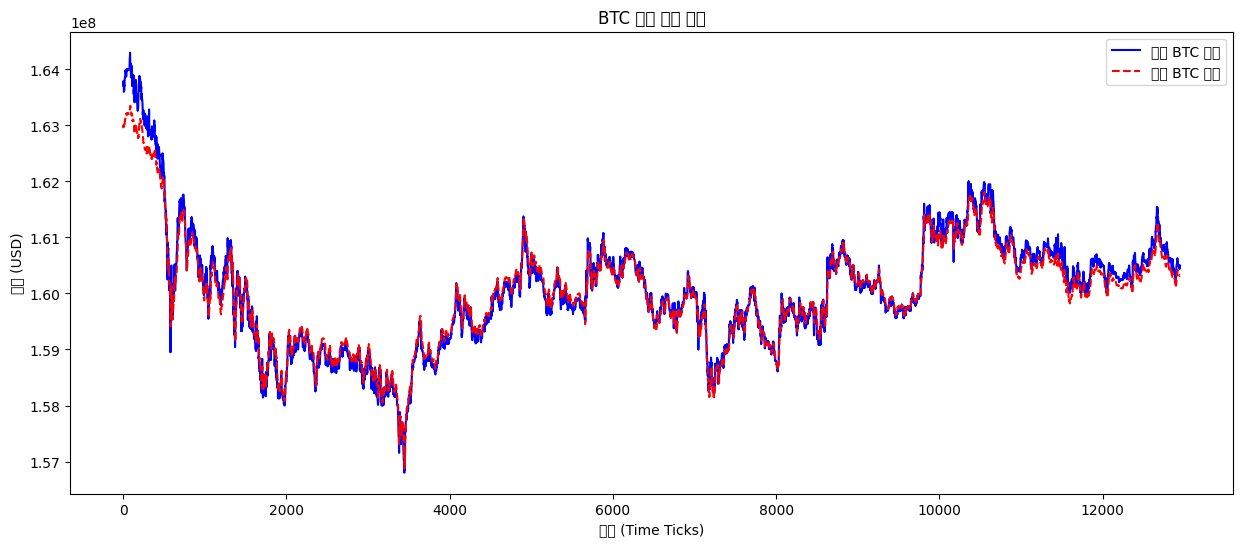

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib

FUTURE_HORIZON = 30 # ÌïôÏäµ ÏãúÏôÄ ÎèôÏùºÌïú Í∞íÏúºÎ°ú ÏÑ§Ï†ï
saved_model = load_model(f'./lstm/btc_price_model_{FUTURE_HORIZON}.h5')
scaler = joblib.load('./lstm/btc_price_scaler.pkl')

# --- RMSE Í≥ÑÏÇ∞ (Ïù¥ Î∂ÄÎ∂ÑÏùÄ Ïù¥Ï†ÑÍ≥º ÎèôÏùº) ---
predictions_scaled = saved_model.predict(X_test)

temp_for_predictions = np.zeros((len(predictions_scaled), num_features))
temp_for_predictions[:, 0] = predictions_scaled.flatten()
predictions = scaler.inverse_transform(temp_for_predictions)[:, 0]

temp_for_y_test = np.zeros((len(y_test), num_features))
temp_for_y_test[:, 0] = y_test.flatten()
y_test_unscaled = scaler.inverse_transform(temp_for_y_test)[:, 0]

rmse = np.sqrt(np.mean((predictions - y_test_unscaled)**2))
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏµúÏ¢Ö RMSE: {rmse:.2f}")


# --- ‚úÖ Í≤∞Í≥º ÏãúÍ∞ÅÌôî ---

# 1. Ïã§Ï†ú Í∞ÄÍ≤© ÌùêÎ¶Ñ Ï†ÑÏ≤¥Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
# y_test_unscaledÎäî ÎØ∏Îûò Í∞íÎì§Ïùò Î™©Î°ùÏù¥ÎØÄÎ°ú, Ïã§Ï†ú ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤© Ïª¨ÎüºÏùÑ ÏßÅÏ†ë ÏÇ¨Ïö©Ìï©ÎãàÎã§.
features = ['btc_close', 'eth_close', 'xrp_close', 'dollar_close', 'gold_close', 'nasdaq_close', 'sp500_close']
test_len = test_len = int(df.shape[0] * 0.1)
test_data_actual_price = df[features]['btc_close'][-test_len:].values


# 2. ÏòàÏ∏°Í∞íÏùÑ Ïã§Ï†ú ÏãúÍ∞Ñ Ï∂ïÏóê ÎßûÍ≤å Î∞∞ÏπòÌï† 'Í∑∏Î¶ºÌåê'ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.
# Ïã§Ï†ú Í∞ÄÍ≤©Í≥º Í∏∏Ïù¥Í∞Ä Í∞ôÍ≥†, ÎπÑÏñ¥ÏûàÎäî(NaN) Î∞∞Ïó¥ÏùÑ ÎßåÎì≠ÎãàÎã§.
plot_predictions = np.full(len(test_data_actual_price), np.nan)

# 3. 'Í∑∏Î¶ºÌåê'Ïùò Ïò¨Î∞îÎ•∏ ÏúÑÏπòÏóê ÏòàÏ∏°Í∞íÏùÑ Ï±ÑÏõå ÎÑ£ÏäµÎãàÎã§.
# X_testÏùò Í∞Å ÏÉòÌîå iÎäî (i + SEQUENCE_LENGTH) ÏãúÏ†êÏóêÏÑú (i + SEQUENCE_LENGTH + FUTURE_HORIZON - 1) ÏãúÏ†êÏùÑ ÏòàÏ∏°Ìïú Í≤ÉÏûÖÎãàÎã§.
# Ïù¥ ÏòàÏ∏°Í∞íÏùÑ Ìï¥Îãπ ÎØ∏Îûò ÏãúÏ†êÏùò Ïù∏Îç±Ïä§Ïóê ÎÑ£ÏäµÎãàÎã§.
for i, pred in enumerate(predictions):
    # ÏòàÏ∏°Ïù¥ Ï†ÅÏö©Îê† ÎØ∏Îûò ÏãúÏ†êÏùò Ïù∏Îç±Ïä§Î•º Í≥ÑÏÇ∞
    prediction_index = i + SEQUENCE_LENGTH + FUTURE_HORIZON - 1

    # Ìï¥Îãπ Ïù∏Îç±Ïä§Í∞Ä Í∑∏Î¶ºÌåê Î≤îÏúÑ ÏïàÏóê ÏûàÏùÑ Í≤ΩÏö∞ÏóêÎßå Í∞íÏùÑ Ï±ÑÏõÅÎãàÎã§.
    if prediction_index < len(plot_predictions):
        plot_predictions[prediction_index] = pred

# 4. Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
plt.figure(figsize=(15, 6))
# Ïã§Ï†ú Í∞ÄÍ≤© ÌùêÎ¶ÑÏùÑ ÌååÎûÄÏÉâ Ïã§ÏÑ†ÏúºÎ°ú Í∑∏Î¶ΩÎãàÎã§.
plt.plot(test_data_actual_price, color='blue', label='BTC Price', zorder=1)
# ÏòàÏ∏° Í∞ÄÍ≤©ÏùÑ Îπ®Í∞ÑÏÉâ Ï†ê ÎòêÎäî ÏßßÏùÄ ÏÑ†ÏúºÎ°ú Í∑∏Î¶ΩÎãàÎã§.
plt.plot(plot_predictions, color='red', label=f'Predicted price in {FUTURE_HORIZON}min', linestyle='--', marker='o', markersize=3, zorder=2)

plt.title(f'BTC Price Prediction ({FUTURE_HORIZON}minutes)')
plt.xlabel('Time Ticks')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
# plt.savefig('btc_prediction_result_horizon.png')
# print("\nÏòàÏ∏° Í≤∞Í≥º Í∑∏ÎûòÌîÑÍ∞Ä 'btc_prediction_result_horizon.png' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
plt.show()

# ÏòàÏ∏°

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib

# --- 1. ÏòàÏ∏° ÌôòÍ≤Ω ÏÑ§Ï†ï (Í∞ÄÏû• Ï§ëÏöîÌïú Î∂ÄÎ∂Ñ) ---
SEQUENCE_LENGTH = 120  # Î™®Îç∏ ÌïôÏäµ ÏãúÏôÄ ÎèôÏùºÌïú ÏãúÌÄÄÏä§ Í∏∏Ïù¥
FUTURE_HORIZON = 30    # üéØ ÏòàÏ∏°ÌïòÍ≥† Ïã∂ÏùÄ ÎØ∏Îûò ÏãúÏ†ê (Î∂Ñ). 1Î∂Ñ Îí§Î•º ÏòàÏ∏°ÌïòÎ†§Î©¥ 1Î°ú ÏÑ§Ï†ï.

# --- 2. Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú ---

# ÏÑ§Ï†ïÌïú FUTURE_HORIZONÏóê ÎßûÎäî Î™®Îç∏ÏùÑ ÎèôÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏòµÎãàÎã§.
# (Î™®Îç∏ ÌååÏùº Ïù¥Î¶ÑÏù¥ 'best_btc_model_horizon_60.h5'ÏôÄ Í∞ôÏùÄ ÌòïÏãùÏù¥ÎùºÍ≥† Í∞ÄÏ†ï)
model_path = f'./lstm/btc_price_model_{FUTURE_HORIZON}.h5'
print(f"'{model_path}' Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§...")
loaded_model = load_model(model_path)
loaded_scaler = joblib.load('./lstm/btc_price_scaler.pkl')

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("./data/data.csv", index_col=0, parse_dates=True)
features_to_use = ['btc_close', 'eth_close', 'xrp_close', 'dollar_close', 'gold_close', 'nasdaq_close', 'sp500_close']
df = df[features_to_use] # ÌïôÏäµ Îïå ÏÇ¨Ïö©Ìïú Î≥ÄÏàòÎßå ÏÑ†ÌÉù
num_features = len(features_to_use)

# --- 3. ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# ‚úÖ .values Ï†úÍ±∞: DataFrameÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ Scikit-learn Í≤ΩÍ≥†Î•º Î∞©ÏßÄÌïòÍ≥† ÏïàÏ†ÑÏÑ±ÏùÑ ÎÜíÏûÑ
new_data_raw = df[-SEQUENCE_LENGTH:]

# Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïúÏßÄ ÌôïÏù∏
if len(new_data_raw) < SEQUENCE_LENGTH:
    print(f"Ïò§Î•ò: ÏòàÏ∏°Ïóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥({SEQUENCE_LENGTH})Î≥¥Îã§ Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")
else:
    # --- 4. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî ---
    new_data_scaled = loaded_scaler.transform(new_data_raw)

    # --- 5. Î™®Îç∏ ÏûÖÎ†• ÌòïÌÉúÎ°ú Î≥ÄÍ≤Ω ---
    new_data_input = np.reshape(new_data_scaled, (1, SEQUENCE_LENGTH, num_features))

    # --- 6. Í∞ÄÍ≤© ÏòàÏ∏° ---
    new_prediction_scaled = loaded_model.predict(new_data_input, verbose=0)

    # --- 7. ÏòàÏ∏° Í≤∞Í≥º Ïó≠Î≥ÄÌôò ---
    temp_for_prediction = np.zeros((1, num_features))
    temp_for_prediction[:, 0] = new_prediction_scaled.flatten()
    new_prediction = loaded_scaler.inverse_transform(temp_for_prediction)[:, 0]

    print("---")
    # ‚úÖ ÏµúÏ¢Ö Ï∂úÎ†• Î©îÏãúÏßÄÎ•º FUTURE_HORIZONÏóê ÎßûÍ≤å ÏàòÏ†ï
    print(f"ÌòÑÏû¨ ÏãúÏ†ê Í∏∞Ï§Ä, {FUTURE_HORIZON}Î∂Ñ Îí§ BTC ÏòàÏ∏° Í∞ÄÍ≤©: {new_prediction[0]:.2f} USD")

# Î∞±ÌÖåÏä§ÌåÖ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm
import joblib

# --- ‚úÖ 1. ÏÑ§Ï†ïÏùò Ïú†Ïó∞ÏÑ± Î∞è Î™ÖÌôïÏÑ± ÌôïÎ≥¥ ---
# Ïù¥ ÏÑπÏÖòÏóêÏÑú Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞Î•º Í¥ÄÎ¶¨Ìï©ÎãàÎã§.

SEQUENCE_LENGTH = 120    # Î™®Îç∏ ÌïôÏäµ Ïãú ÏÇ¨Ïö©Ìïú ÏãúÌÄÄÏä§ Í∏∏Ïù¥
FUTURE_HORIZON = 30       # ÏòàÏ∏°Ìï† ÎØ∏Îûò ÏãúÏ†ê (Î∂Ñ). 1Î∂Ñ Îí§ Î™®Îç∏ÏùÄ 1, 60Î∂Ñ Îí§ Î™®Îç∏ÏùÄ 60
FEE_RATE = 0.0005        # Í±∞Îûò ÏàòÏàòÎ£å (Ïòà: 0.05%)
BUY_THRESHOLD = 0.001    # ÌòÑÏû¨Í∞Ä ÎåÄÎπÑ 0.1% Ïù¥ÏÉÅ ÏÉÅÏäπ ÏòàÏ∏° Ïãú Îß§Ïàò
SELL_THRESHOLD = 0.001   # ÌòÑÏû¨Í∞Ä ÎåÄÎπÑ 0.1% Ïù¥ÏÉÅ ÌïòÎùΩ ÏòàÏ∏° Ïãú Îß§ÎèÑ

# --- 2. Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---

# ÏÑ§Ï†ïÍ∞íÏóê Îî∞Îùº Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞Î•º ÎèôÏ†ÅÏúºÎ°ú Ï§ÄÎπÑÌï©ÎãàÎã§.
if FUTURE_HORIZON == 1:
    model_path = './lstm/btc_price_model.h5' # 1Î∂Ñ ÏòàÏ∏° Î™®Îç∏ Ïù¥Î¶Ñ
else:
    model_path = f'./lstm/btc_price_model_{FUTURE_HORIZON}.h5'

print(f"'{model_path}' Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§...")
model = load_model(model_path)
scaler = joblib.load('./lstm/btc_price_scaler.pkl')

df = pd.read_csv("./data/data.csv", index_col=0, parse_dates=True)
# ‚úÖ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìïú Î≥ÄÏàò Î™©Î°ùÏùÑ Î™ÖÌôïÌûà Ï†ïÏùò
features_to_use = ['btc_close', 'eth_close', 'xrp_close', 'dollar_close', 'gold_close', 'nasdaq_close', 'sp500_close']
df = df[features_to_use]
num_features = len(features_to_use)

test_len = int(df.shape[0] * 0.1)
backtest_data_raw = df[-test_len:].copy()

# Ï¥àÍ∏∞ ÏûêÎ≥∏Í∏à ÏÑ§Ï†ï
initial_capital = 1000000
cash = initial_capital
btc_held = 0

portfolio_history = []
transaction_log = []

print("--- Î∞±ÌÖåÏä§ÌåÖ ÏãúÏûë ---")
print(f"Ï¥àÍ∏∞ ÏûêÎ≥∏: {initial_capital:,.0f}Ïõê")

# --- 3. ÏãúÎÆ¨Î†àÏù¥ÏÖò Î£®ÌîÑ ---

for i in tqdm(range(len(backtest_data_raw) - SEQUENCE_LENGTH - 1)):
    input_sequence_raw = backtest_data_raw.iloc[i : i + SEQUENCE_LENGTH]
    current_price = backtest_data_raw.iloc[i + SEQUENCE_LENGTH]['btc_close']
    
    input_sequence_scaled = scaler.transform(input_sequence_raw)
    input_model = np.reshape(input_sequence_scaled, (1, SEQUENCE_LENGTH, num_features))
    prediction_scaled = model.predict(input_model, verbose=0)
    
    temp_array = np.zeros((1, num_features))
    temp_array[:, 0] = prediction_scaled.flatten()
    predicted_price = scaler.inverse_transform(temp_array)[:, 0][0]

    # ‚úÖ 4. ÌòÑÏã§Ï†ÅÏù∏ Îß§Îß§ Ï†ÑÎûµ Î∞è Í±∞Îûò ÎπÑÏö© Î∞òÏòÅ ---
    
    # Îß§Ïàò Ï°∞Í±¥: ÏòàÏ∏° Í∞ÄÍ≤©Ïù¥ ÌòÑÏû¨Í∞ÄÎ≥¥Îã§ 'BUY_THRESHOLD' Ïù¥ÏÉÅ Ïò§Î•º Í≤É Í∞ôÍ≥†, ÌòÑÍ∏àÏù¥ ÏûàÏùÑ Îïå
    if predicted_price > current_price * (1 + BUY_THRESHOLD) and cash > 0:
        # ÏàòÏàòÎ£åÎ•º Ï†úÏô∏ÌïòÍ≥† ÏÇ¥ Ïàò ÏûàÎäî BTC ÏàòÎüâ Í≥ÑÏÇ∞
        btc_to_buy = (cash / current_price) * (1 - FEE_RATE)
        btc_held += btc_to_buy
        cash = 0
        transaction_log.append(f"ÏãúÏ†ê {i}: Îß§Ïàò | Í∞ÄÍ≤©: {current_price:,.0f} | ÏàòÎüâ: {btc_to_buy:.4f}")
        
    # Îß§ÎèÑ Ï°∞Í±¥: ÏòàÏ∏° Í∞ÄÍ≤©Ïù¥ ÌòÑÏû¨Í∞ÄÎ≥¥Îã§ 'SELL_THRESHOLD' Ïù¥ÏÉÅ ÎÇ¥Î¶¥ Í≤É Í∞ôÍ≥†, Î≥¥Ïú†Ìïú BTCÍ∞Ä ÏûàÏùÑ Îïå
    elif predicted_price < current_price * (1 - SELL_THRESHOLD) and btc_held > 0:
        # ÏàòÏàòÎ£åÎ•º Ï†úÏô∏ÌïòÍ≥† Î∞õÍ≤å Îê† ÌòÑÍ∏à Í≥ÑÏÇ∞
        cash = (btc_held * current_price) * (1 - FEE_RATE)
        btc_held = 0
        transaction_log.append(f"ÏãúÏ†ê {i}: Îß§ÎèÑ | Í∞ÄÍ≤©: {current_price:,.0f} | Ïã§ÌòÑÍ∏àÏï°: {cash:,.0f}Ïõê")
    
    # Í∑∏ Ïô∏Ïùò Í≤ΩÏö∞ (Îß§Ïàò/Îß§ÎèÑ Ï°∞Í±¥ ÏÇ¨Ïù¥Ïùò 'Ï§ëÎ¶Ω Íµ¨Í∞Ñ')Îäî ÏïÑÎ¨¥Í≤ÉÎèÑ ÌïòÏßÄ ÏïäÏùå (Hold)
    
    current_portfolio_value = cash + (btc_held * current_price)
    portfolio_history.append(current_portfolio_value)

# --- 5. Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ---
# (Ïù¥ Î∂ÄÎ∂ÑÏùÄ Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùº)

if not portfolio_history:
    print("\nÍ±∞ÎûòÍ∞Ä Ìïú Î≤àÎèÑ Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
else:
    final_portfolio_value = portfolio_history[-1]
    profit = final_portfolio_value - initial_capital
    profit_rate = (profit / initial_capital) * 100

    print("\n--- Î∞±ÌÖåÏä§ÌåÖ Ï¢ÖÎ£å ---")
    for log in transaction_log[:5]:
        print(log)
    if len(transaction_log) > 5: print("...")

    print(f"\nÏµúÏ¢Ö ÏûêÏÇ∞: {final_portfolio_value:,.0f}Ïõê")
    print(f"Ï¥ù ÏÜêÏùµ: {profit:,.0f}Ïõê")
    print(f"ÏàòÏùµÎ•†: {profit_rate:.2f}%")

    plt.figure(figsize=(15, 6))
    plt.plot(portfolio_history, label='Portfolio Value', color='blue')
    plt.title('Improved Automated Trading Backtesting Results')
    plt.xlabel('Time (Time Ticks)')
    plt.ylabel('Portfolio Value (KRW)')
    plt.legend()
    plt.grid(True)
    plt.show()

--- Î∞±ÌÖåÏä§ÌåÖ ÏãúÏûë ---
Ï¥àÍ∏∞ ÏûêÎ≥∏: 1,000,000Ïõê


 29%|‚ñà‚ñà‚ñä       | 3283/11519 [07:55<19:53,  6.90it/s]  


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm
import joblib

# --- ‚úÖ 1. ÏÑ§Ï†ï Î≥¥Í∞ï ---
SEQUENCE_LENGTH = 120
FUTURE_HORIZON = 30
FEE_RATE = 0.0005
# ‚úÖ Ïù¥ÎèôÌèâÍ∑†ÏÑ† Í∏∞Í∞Ñ ÏÑ§Ï†ï
SHORT_MA_WINDOW = 20
LONG_MA_WINDOW = 60

# --- 2. Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
if FUTURE_HORIZON == 1:
    model_path = './lstm/btc_price_model.h5'
else:
    model_path = f'./lstm/btc_price_model_{FUTURE_HORIZON}.h5'

print(f"'{model_path}' Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§...")
model = load_model(model_path)
scaler = joblib.load('./lstm/btc_price_scaler.pkl')

df = pd.read_csv("./data/data.csv", index_col=0, parse_dates=True)
features_to_use = ['btc_close', 'eth_close', 'xrp_close', 'dollar_close', 'gold_close', 'nasdaq_close', 'sp500_close']
df = df[features_to_use]
num_features = len(features_to_use)

test_len = int(df.shape[0] * 0.1)
backtest_data_raw = df[-test_len:].copy()

# ‚úÖ Ïù¥ÎèôÌèâÍ∑†ÏÑ† Í≥ÑÏÇ∞
backtest_data_raw['short_ma'] = backtest_data_raw['btc_close'].rolling(window=SHORT_MA_WINDOW).mean()
backtest_data_raw['long_ma'] = backtest_data_raw['btc_close'].rolling(window=LONG_MA_WINDOW).mean()

# Ï¥àÍ∏∞ ÏûêÎ≥∏Í∏à ÏÑ§Ï†ï
initial_capital = 1000000
cash = initial_capital
btc_held = 0

portfolio_history = []
transaction_log = []

print("--- Î∞±ÌÖåÏä§ÌåÖ ÏãúÏûë ---")
print(f"Ï¥àÍ∏∞ ÏûêÎ≥∏: {initial_capital:,.0f}Ïõê")

# --- 3. ÏãúÎÆ¨Î†àÏù¥ÏÖò Î£®ÌîÑ ---
for i in tqdm(range(len(backtest_data_raw) - SEQUENCE_LENGTH - 1)):
    input_sequence_raw = backtest_data_raw.iloc[i : i + SEQUENCE_LENGTH]
    
    # ‚úÖ ÌòÑÏû¨ ÏãúÏ†êÏùÑ tÎ°ú Ï†ïÏùò (ÏùòÏÇ¨Í≤∞Ï†ï ÏãúÏ†ê)
    t = i + SEQUENCE_LENGTH
    current_price = backtest_data_raw.iloc[t]['btc_close']
    
    # ‚úÖ Ïù¥ÎèôÌèâÍ∑†ÏÑ† Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
    short_ma_current = backtest_data_raw['short_ma'].iloc[t]
    long_ma_current = backtest_data_raw['long_ma'].iloc[t]
    short_ma_prev = backtest_data_raw['short_ma'].iloc[t-1]
    long_ma_prev = backtest_data_raw['long_ma'].iloc[t-1]
    
    # ‚úÖ Ïù¥ÎèôÌèâÍ∑†ÏÑ†Ïù¥ Í≥ÑÏÇ∞ÎêòÏßÄ ÏïäÏùÄ Ï¥àÍ∏∞ Íµ¨Í∞ÑÏùÄ Í±¥ÎÑàÎúÄ
    if pd.isna(long_ma_current) or pd.isna(long_ma_prev):
        portfolio_history.append(cash + (btc_held * current_price))
        continue

    # LSTM ÏòàÏ∏° (Ïù¥ Î∂ÄÎ∂ÑÏùÄ ÎèôÏùº)
    input_sequence_scaled = scaler.transform(input_sequence_raw)
    input_model = np.reshape(input_sequence_scaled, (1, SEQUENCE_LENGTH, num_features))
    prediction_scaled = model.predict(input_model, verbose=0)
    
    temp_array = np.zeros((1, num_features))
    temp_array[:, 0] = prediction_scaled.flatten()
    predicted_price = scaler.inverse_transform(temp_array)[:, 0][0]

    # --- ‚úÖ 4. Ïù¥ÌèâÏÑ† ÍµêÏ∞® + LSTM ÌôïÏù∏ Ï†ÑÎûµ ---
    
    # Ïã†Ìò∏ Ï†ïÏùò
    golden_cross = (short_ma_prev < long_ma_prev) and (short_ma_current > long_ma_current)
    dead_cross = (short_ma_prev > long_ma_prev) and (short_ma_current < long_ma_current)
    lstm_confirms_buy = predicted_price > current_price
    lstm_confirms_sell = predicted_price < current_price

    # Îß§Ïàò Ï°∞Í±¥: Í≥®Îì† ÌÅ¨Î°úÏä§ Î∞úÏÉù + LSTMÏù¥ ÏÉÅÏäπ ÏòàÏ∏° + ÌòÑÍ∏à Î≥¥Ïú†
    if golden_cross and lstm_confirms_buy and cash > 0:
        btc_to_buy = (cash / current_price) * (1 - FEE_RATE)
        btc_held += btc_to_buy
        cash = 0
        transaction_log.append(f"ÏãúÏ†ê {t}: Îß§Ïàò (Í≥®Îì†ÌÅ¨Î°úÏä§) | Í∞ÄÍ≤©: {current_price:,.0f}")
        
    # Îß§ÎèÑ Ï°∞Í±¥: Îç∞Îìú ÌÅ¨Î°úÏä§ Î∞úÏÉù + LSTMÏù¥ ÌïòÎùΩ ÏòàÏ∏° + BTC Î≥¥Ïú†
    elif dead_cross and lstm_confirms_sell and btc_held > 0:
        cash = (btc_held * current_price) * (1 - FEE_RATE)
        btc_held = 0
        transaction_log.append(f"ÏãúÏ†ê {t}: Îß§ÎèÑ (Îç∞ÎìúÌÅ¨Î°úÏä§) | Í∞ÄÍ≤©: {current_price:,.0f}")
    
    current_portfolio_value = cash + (btc_held * current_price)
    portfolio_history.append(current_portfolio_value)

# --- 5. Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ---
# (Ïù¥ Î∂ÄÎ∂ÑÏùÄ Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùº)

if not portfolio_history or not transaction_log:
    print("\nÍ±∞ÎûòÍ∞Ä Ìïú Î≤àÎèÑ Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
else:
    final_portfolio_value = portfolio_history[-1]
    profit = final_portfolio_value - initial_capital
    profit_rate = (profit / initial_capital) * 100

    print("\n--- Î∞±ÌÖåÏä§ÌåÖ Ï¢ÖÎ£å ---")
    for log in transaction_log:
        print(log)

    print(f"\nÏµúÏ¢Ö ÏûêÏÇ∞: {final_portfolio_value:,.0f}Ïõê")
    print(f"Ï¥ù ÏÜêÏùµ: {profit:,.0f}Ïõê")
    print(f"ÏàòÏùµÎ•†: {profit_rate:.2f}%")

    plt.figure(figsize=(15, 6))
    plt.plot(portfolio_history, label='Portfolio Value', color='blue')
    plt.title('MA Crossover + LSTM Backtesting Results')
    plt.xlabel('Time (Time Ticks)')
    plt.ylabel('Portfolio Value (KRW)')
    plt.legend()
    plt.grid(True)
    plt.show()